In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exportdata = pd.read_csv("export.csv")
importdata = pd.read_csv("import.csv")

In [3]:
exportdata.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [4]:
exportdata.describe(include="all")

,HSCode,Commodity,value,country,year
count,137023.000000,137023,122985.000000,137023,137023.000000
unique,NaN,98,NaN,248,NaN
top,NaN,ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...,NaN,U ARAB EMTS,NaN
freq,NaN,1963,NaN,882,NaN
mean,51.330302,NaN,21.567829,NaN,2014.056304
std,28.018026,NaN,229.701279,NaN,2.580160
min,1.000000,NaN,0.000000,NaN,2010.000000
25%,28.000000,NaN,0.030000,NaN,2012.000000
50%,52.000000,NaN,0.360000,NaN,2014.000000
75%,74.000000,NaN,3.770000,NaN,2016.000000


In [5]:
exportdata=exportdata.replace(0,np.nan)
data=exportdata.dropna()

In [6]:
exportsperyear = data.groupby('year').sum()

In [7]:
exportsperyear

,HSCode,value
year,,
2010,585434,249801.18
2011,598507,305948.28
2012,599241,300384.32
2013,607636,314388.61
2014,607405,310321.02
2015,601814,262274.30
2016,598997,275835.27
2017,611215,303507.85
2018,613181,330058.64


In [8]:
exportsperyear.reset_index(level=0,inplace=True)

In [9]:
exportsperyear

,year,HSCode,value
0,2010,585434,249801.18
1,2011,598507,305948.28
2,2012,599241,300384.32
3,2013,607636,314388.61
4,2014,607405,310321.02
5,2015,601814,262274.30
6,2016,598997,275835.27
7,2017,611215,303507.85
8,2018,613181,330058.64


In [10]:
exportsperyear.drop('HSCode',axis=1,inplace=True)

In [11]:
exportsperyear

,year,value
0,2010,249801.18
1,2011,305948.28
2,2012,300384.32
3,2013,314388.61
4,2014,310321.02
5,2015,262274.30
6,2016,275835.27
7,2017,303507.85
8,2018,330058.64


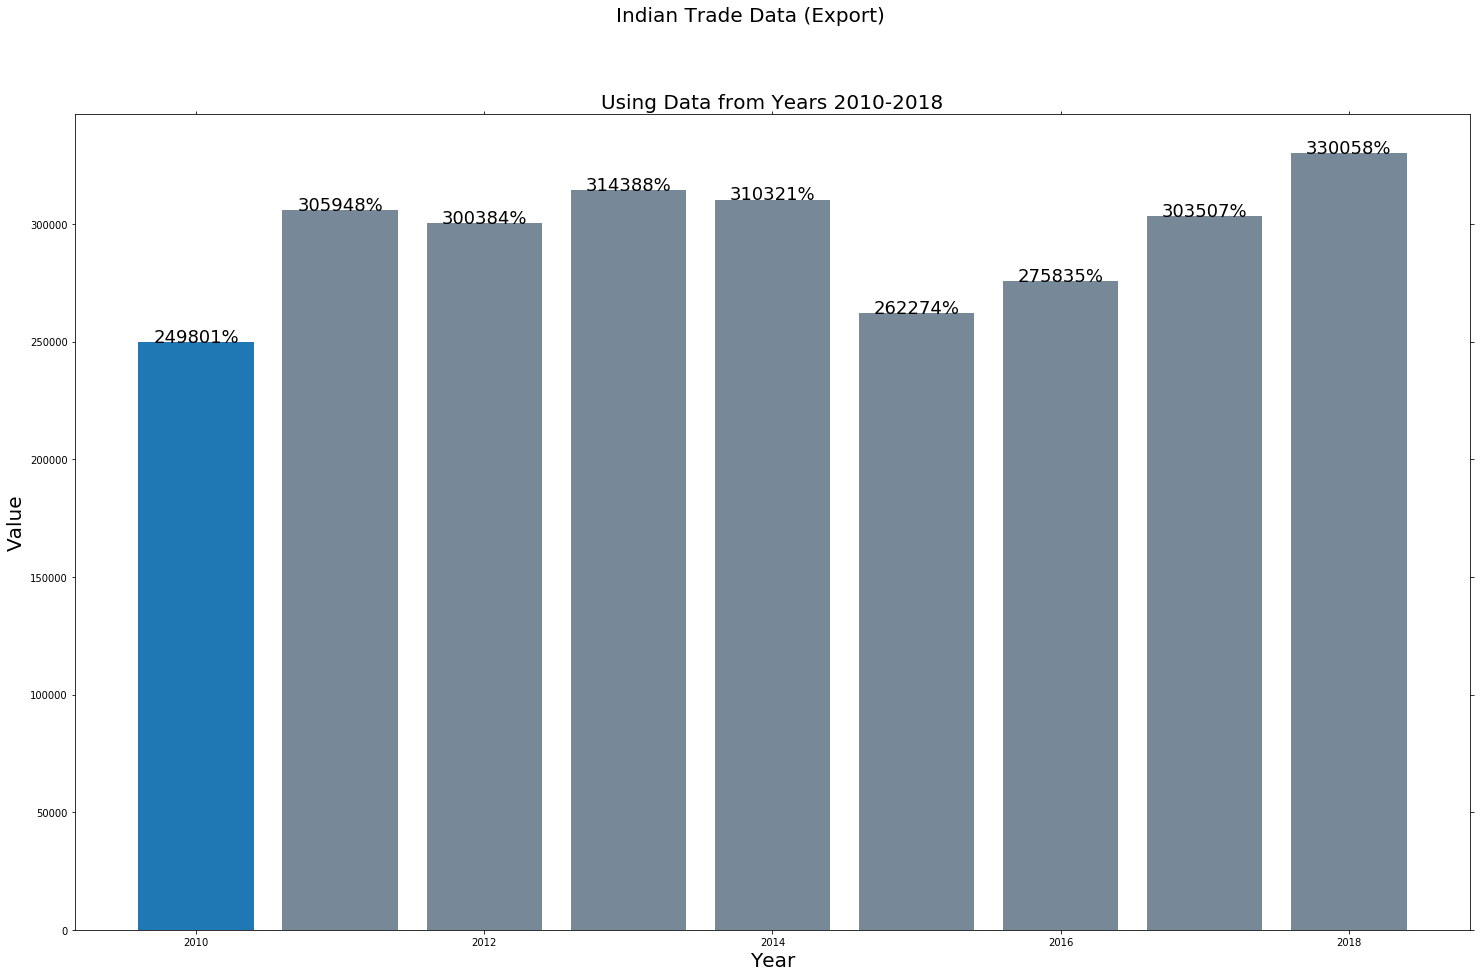

In [22]:
plt.figure(figsize=(25,15))
#plt.bar(x,y)

plt.bar(exportsperyear['year'],exportsperyear['value'])

#use .suptitle for the actual title and .title for the subheading

plt.suptitle('Indian Trade Data (Export)',fontsize=20)
plt.title('Using Data from Years 2010-2018', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Value', fontsize=20)

bars=plt.bar(exportsperyear['year'],exportsperyear['value'], align='center',linewidth=0, color='lightslategray')
# Change one bar, to contrasting color:
bars[0].set_color('#1F77B4')

# Remove all ticks
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# Remove the frame

#for spine in plt.gca().spines.values():
    #spine.set_visible(False)
# Direct label each bar with Y axis values

for bar in bars:
    height=bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height()-5, str(int(height)) + '%',
                  ha='center', color='black', fontsize=18)